<a href="https://colab.research.google.com/github/saptarshi98/Data-structre-Stack/blob/master/image%20clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

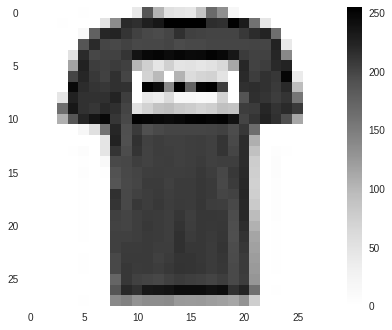

In [38]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [0]:
#SCALING IMAGES BEFORE FEEDING TO NEURAL NETWORK
train_images = train_images/255
test_images = test_images/255

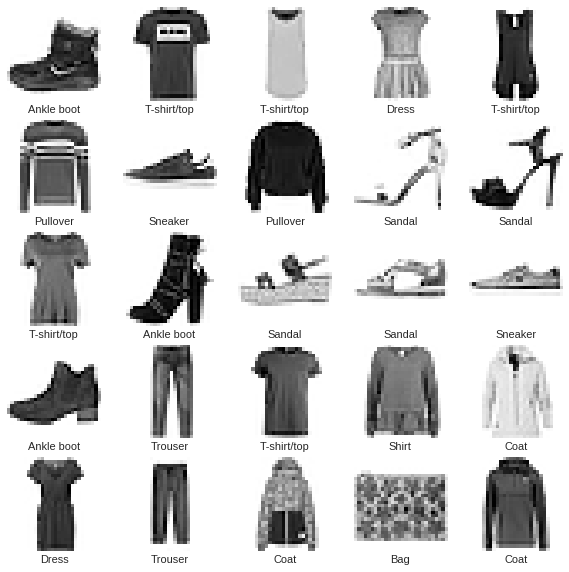

In [40]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                         keras.layers.Dense(128, activation = tf.nn.relu),
                         keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                         
                         

           

In [42]:
model.fit(train_images,train_labels, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.5027 - acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3760 - acc: 0.8636
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3370 - acc: 0.8764
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3112 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2940 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2791 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2695 - acc: 0.9010
Epoch 8/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2579 - acc: 0.9036
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2472 - acc: 0.9089
Epoch 10/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2404 - acc: 0.9096

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy = ", test_acc*100)

10000/10000 [==============================] - 0s 39us/step
Test accuracy =  87.94999999999999


In [44]:
prediction = model.predict(test_images) #returns an array of confidence the value with highest confidence is the predicted category
prediction[0]


array([1.3789635e-07, 1.7867992e-08, 8.5437605e-08, 5.8205871e-11,
       5.3925922e-09, 7.1105798e-04, 1.1562105e-08, 1.0540327e-02,
       9.1142525e-08, 9.8874819e-01], dtype=float32)

In [45]:
np.argmax(prediction[0])

9

In [0]:
def plot_img(i, prediction_list, true_label, img):
  prediction_list, true_label, img = prediction_list[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_list)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_list),
                                class_names[true_label]),
                                color=color)

def plot_bar(i, prediction_list, true_label):
  prediction_list, true_label = prediction_list[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_list, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(prediction_list)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

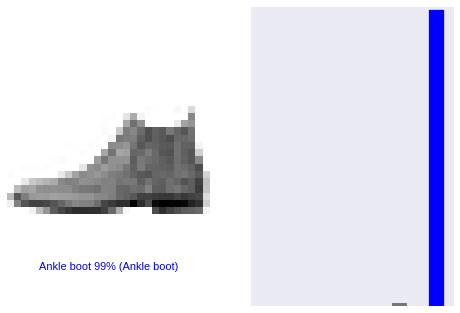

In [47]:
i = 0
plt.figure()
plt.subplot(1,2,1)
plot_img(i, prediction, test_labels,test_images )
plt.subplot(1,2,2)
plot_bar(i, prediction, test_labels)

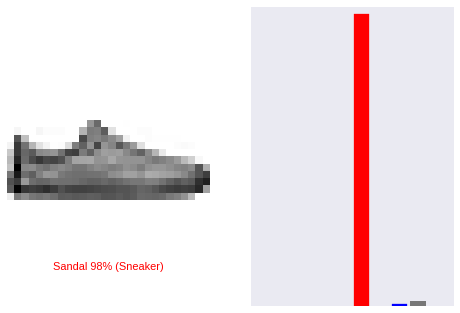

In [48]:
i = 12
plt.figure()
plt.subplot(1,2,1)
plot_img(i, prediction, test_labels,test_images )
plt.subplot(1,2,2)
plot_bar(i, prediction, test_labels)

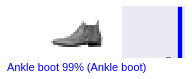

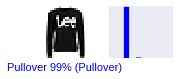

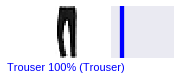

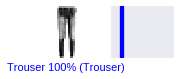

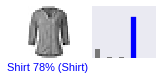

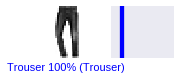

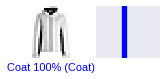

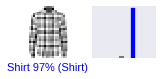

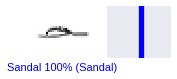

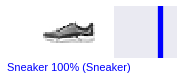

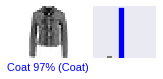

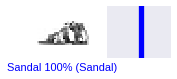

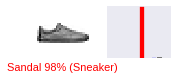

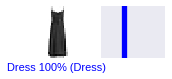

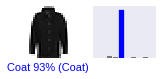

In [49]:
for i in range(15):
  plt.figure()
  plt.subplot(5,6,2*i+1)
  plot_img(i, prediction, test_labels, test_images)
  plt.subplot(5,6,2*i+2)
  plot_bar(i, prediction, test_labels)